# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# sklearn imports
from sklearn.datasets import load_iris

# 1. Machine Learning Basics

## 1.1 What is machine learning?

*Definition:* A computer program is said to learn from experience **E** with respect to some class of tasks **T**, and performance measure **P**, if its performance at tasks in **T**, as measured by **P** , improves with experience **E**.
Here the problem will be viewed in a **probabilistic persepective**, meaning that all unknown quantities are treated as **random variable**, that are endowed with **probability distributions**.
Why?:
- optimal approach for decision making under uncertainty (see 5.1 in the book)
- probabilistic modelling provides a unifying framework between many different fields, e.g. control theory, statistical physics, bio-statistics and more

## 1.2 Supervised learning

Task T: Learn a mapping $f$ from inputs $\mathcal{x} \in \mathcal{X}$ to outputs $\mathcal{y} \in \mathcal{Y}$.

|                             |                                                                            |
|-----------------------------|----------------------------------------------------------------------------|
| Inputs:                     | $\mathcal{x}$: **features**, **covariates**, **predictors**                |
|                             | *Examples*: height/weight of people, or pixels in an image                 |
|                             | Here: $\mathcal{X}=\mathbb{R}^D$; D - dimensionality of vector (#features) |                
| Outputs:                    | $\mathcal{y}$: **label**, **target**, **response**                         |

Experience E: $N$ (**sample size**) input-output pairs $\mathcal{D}={(\mathcal{x}_n, \mathcal{y}_n)}^{N}_{n=1}$: **training set**
Performance P: Depends on the type of output we are predicting

### 1.2.1 Classification

Output space: $\mathcal{C}$ unordered **classes** $\mathcal{Y}={1,2,..,C}$, if there are just two classes, often $\mathcal{y} \in \{0,1\}$ or $\mathcal{y} \in \{-1, +1\}$ it is called **binary classification**.

#### 1.2.1.1 Example: Iris flower set

In [3]:
# Load iris dataset
iris_data = load_iris()
# prepare a pandas as dataframe
iris_df = pd.DataFrame(iris_data.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris_df['label'] = iris_data.target
iris_df.label = iris_df.label.astype('category')
# Map the integer label to its actual string name
label_map_dict = {target_label:target_string for target_label, target_string in zip(np.sort(iris_df.label.unique()), iris_data.target_names)}
iris_df['label_verbose'] = iris_df.label.map(label_map_dict).astype('category')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,label,label_verbose
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


As seen by the pandas data frame there are 4 features and 1 class label as output. A classification task would be to predict the class label given the 4 features. For this task we can arrange our data in a design matrix $\mathcal{X}$ which is an $N x D$ matrix. And output vector $\mathcal{y}$ which is a $N x 1$ column vector.

In [4]:
# Design matrix
X = iris_df.iloc[:, :4].to_numpy()
print(f'Number of samples: {X.shape[0]} \nNumber of features: {X.shape[1]}')
y = iris_df.iloc[:, 4].to_numpy()
print(f'Number of samples: {y.shape[0]} \nNumber of unique labels: {np.unique(y).size}')

Number of samples: 150 
Number of features: 4
Number of samples: 150 
Number of unique labels: 3


The iris data set is an example of **tabular data**. When the inputs are of variable size (e.g. sequences of words). The data is stored in another formath than in a design matrix. However often such data is converted into a design matrix through a process known as **featurization**.

### 1.2.1.2 Exploratory data analysis

Before applying ML solutions it makes sense to perform an exploratory data analysis first. For small numbers of features as in the iris dataset a pairplot might be appropriate.

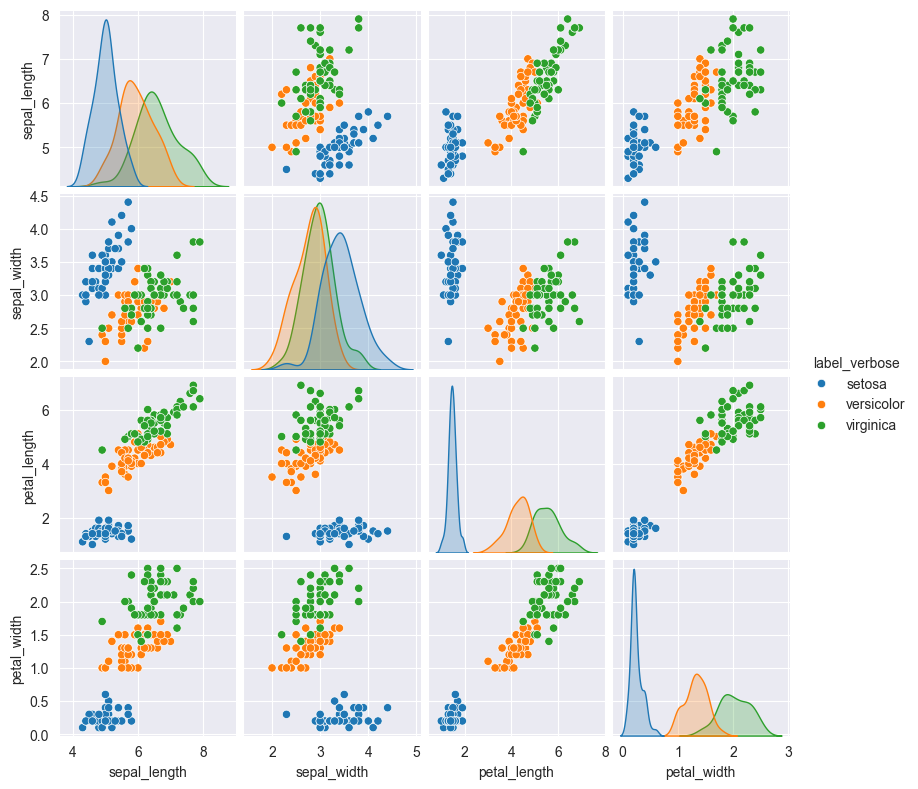

In [5]:
sns.pairplot(data=iris_df, hue='label_verbose', kind='scatter', height=2)

For higher dimensional datasets it is common to apply **dimensionality reduction** to visualize data in 2d or 3d.

#### 1.2.1.3 Learning a classifier

A simple classfier can be created by stating a **decision rule** (note this is not learned yet). For example the setosa class can be separated well by its petal length. The other classes can then be (in this case imperfectly) separated by another decision rule, e.g. by the petal length. This creates a 2d **decision surface**, where 2 derives from the number of used features for classification and can be generally much higher dimensional.

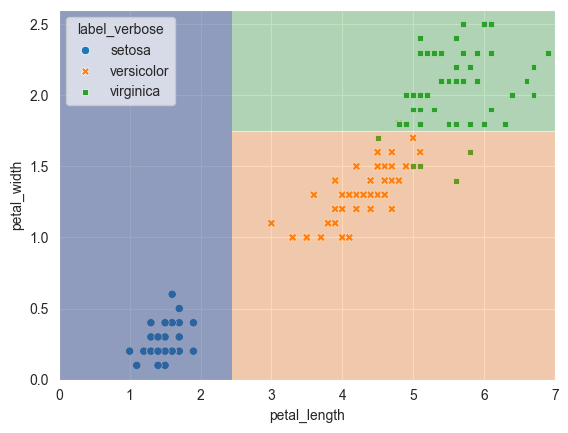

In [6]:
fig, ax = plt.subplots()
sns.scatterplot(data=iris_df, x='petal_length', y='petal_width', hue='label_verbose', style='label_verbose', ax=ax)
x_lims = [0, iris_df.petal_length.max()+0.1]
y_lims = [0, iris_df.petal_width.max()+0.1]
ax.set_xlim(x_lims)
ax.set_ylim(y_lims)
grid_resolution = 0.01
# Setosa shaded area
setosa_rule = 2.45 # smaller than
setosa_grid_xx1, setosa_grid_xx2 = np.meshgrid(np.arange(0, setosa_rule, grid_resolution),
                          np.arange(y_lims[0], y_lims[1], grid_resolution))
Z = np.ones(setosa_grid_xx1.shape)
plt.contourf(setosa_grid_xx1, setosa_grid_xx2, Z, alpha=0.3)
# Setosa shaded area
setosa_rule = 2.45 # smaller than
setosa_grid_xx1, setosa_grid_xx2 = np.meshgrid(np.arange(0, setosa_rule, grid_resolution),
                                               np.arange(y_lims[0], y_lims[1], grid_resolution))
Z = np.ones(setosa_grid_xx1.shape)
plt.contourf(setosa_grid_xx1, setosa_grid_xx2, Z, alpha=0.3, colors=sns.color_palette().as_hex()[0])
# Versicolor shaded area
versicolor_rule = 1.75 # smaller than
versicolor_grid_xx1, versicolor_grid_xx2 = np.meshgrid(np.arange(setosa_rule, x_lims[1], grid_resolution),
                                               np.arange(0, versicolor_rule, grid_resolution))
Z = np.ones(versicolor_grid_xx1.shape)*2
plt.contourf(versicolor_grid_xx1, versicolor_grid_xx2, Z, alpha=0.3, colors=sns.color_palette().as_hex()[1])
# virginica shaded area
virginica_grid_xx1, virginica_grid_xx2 = np.meshgrid(np.arange(setosa_rule, x_lims[1], grid_resolution),
                                                       np.arange(versicolor_rule, y_lims[1], grid_resolution))
Z = np.ones(virginica_grid_xx1.shape)*3
plt.contourf(virginica_grid_xx1, virginica_grid_xx2, Z, alpha=0.3, colors=sns.color_palette().as_hex()[2])


#### 1.2.1.4 Empirical risk minimization

Goal of supervised learning is to find classification models that reliably predict the labels. A common performance measure is the **missclassification rate**.

$$\mathcal{L}(\textbf{\theta})=\frac{1}{N}\sum_{n=1}^{N}\mathbb{I}(y_n \neq \mathcal{f}(\textbf{\mathcal{x}}_n ; \textbf{\theta}))$$

Where $\mathbb{I}$ is the binary indicator function:

$$ \mathbb{I}(e) = \[ \begin{cases} 
      1\ if\ e\ is\ true \\
      0\ if\ e\ is\ false \\
   \end{cases}
\]$$

This assumes the error is equal for all missclassifications. There might be cases where we want to associate an error with more weight, e.g. by using a loss matrix.

|           |            |        | **Estimate** |           |
|:---------:|:----------:|:------:|:------------:|:---------:|
|           |            | Setosa |  Versicolor  | Virginica |
|           |   Setosa   |    0   |       1      |     1     |
| **Truth** | Versicolor |    1   |       0      |     0     |
|           |  Virginica |   10   |      10      |     0     |

The empirical risk can then be defined to be the average loss of the predictor, depending on the **loss function** $l$ on the training set:
$$
\mathcal{L}(\textbf{\theta})=\frac{1}{N}\sum_{n=1}^{N}{l(y_n,f(\textbf{\mathcal{x}}_n; \textbf{\theta}))}
$$

The problem of **model fitting** or **training** is to find a set of parameters that minimizes the empirical risk on the training set.
$$
\textbf{\hat{\theta}} = \underset{\textbf{\theta}}{\mathrm{argmin}}\mathcal{L}(\textbf{\theta}) = \underset{\textbf{\theta}}{\mathrm{argmin}} \frac{1}{N}\sum_{n=1}^{N}{l(y_n,f(\textbf{\mathcal{x}}_n; \textbf{\theta}))}
$$

This is called **empirical risk minimization**. It should be noted though that the true goal is to minimize expected loss on future data, to **generalize**.

#### 1.2.1.5 Uncertainty

In mose cases future it is not possible to perfectly predict an exact output given an input. There are two uncertainties to consider:
1. **Model uncertainty** (We lack full knowledge of the input-output mapping/function)
2. **Data uncertainty** (there is noise in our data)

Uncertainty can be captured by the following **conditional probability distribution**:
$$
p(y=c|\textbf{\mathcal{x};\textbf{\mathcal{\theta}}}) = f_c(\textbf{\mathcal{x};\textbf{\mathcal{\theta}}})
$$
Where $f:\mathcal{X}\rightarrow[0,1]^C$ is a mapping of inputs to a probability distribution over C possible output labels. Since $f_c(\textbf{\mathcal{x};\textbf{\mathcal{\theta}}})$ should return a probablity we require $0 \leq f_c \leq 1$ for each individual class $c$, and $\sum_{c=1}^{C}f_c=1$. To avoid this restrictions we can instead require the model to return unnormalized log-probabilities and squash these with the **softmax function**:
$$
S(\textbf{a}) = \left[\frac{e^{a_1}}{\sum_{c'=1}^{C} e^{a_{c'}}}, ..., \frac{e^{a_C}}{\sum_{c'=1}^{C} e^{a_{c'}}}\right]
$$
The input to the softmax function $\textbf{a}=f(\textbf{\mathcal{x};\textbf{\mathcal{\theta}}})$ are called **logits**. We thus define the overall model as follows:

$$
p(y=c|\textbf{\mathcal{x};\textbf{\mathcal{\theta}}}) = S_c(f(\textbf{\mathcal{x};\textbf{\mathcal{\theta}}}))
$$

A common special case of this is if $f$ is an **affine function**:
$$
f(\textbf{\mathcal{x};\textbf{\mathcal{\theta}}}) = b+\textbf{w}^\intercal\textbf\mathcal{x}
$$
*Note: An affine transformation between two vector spaces consists of a linear transformation followed by a translation. Here the translation follows from the **intercept** or **bias**.
where $\textbf{\theta}=(b,\textbf{w})$ are the parameters of the model. This model is called **logistic regression**. In statistics $\textbf{w}$ are called **regression coefficients**, in ML weights. $b$ in statistics is called **intercept**, in ML **bias**. Note this bias is different from the statistical concept *bias*. It is common to absorb the bias into the weights and defining $\mathbf{\tilde{w}}=[b,w_1, ..., w_D]$ and defining $\mathbf{\tilde{x}}=[1, x_1, ..., x_D]$. This converts the affine function into a **linear function**:
$$
f(\textbf{x};\textbf{w})=\textbf{w}^\intercal\textbf{x}
$$
